In [1]:
!rm eco.so

In [3]:
!make py

clang++ -O3 -undefined dynamic_lookup -shared -std=c++17 -fPIC `python -m pybind11 --includes` basic_tools.cpp classes.cpp ecosystem_bindings.cpp -o eco.so


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

import time
import sys
sys.path.insert(0, '/Users/JuanLuis/git/Ecosystems/pruebas_cpp/')
import eco
import copy

from IPython.display import HTML, display
import tabulate

In [5]:
start = time.time()
e = eco.Ecosystem()
e.initialize()
#e.create_new_organisms(eco.OrganismType.PLANT_A, 20);
#e.create_new_organisms(eco.OrganismType.PLANT_B, 20);
e.create_new_organisms(eco.OrganismType.HERBIVORE, 20);
e.create_new_organisms(eco.OrganismType.CARNIVORE, 20);
print("init time: {:.2f}ms".format(1000 * (time.time() - start)))

def strength_ph_cap(org_type):
    if org_type in [eco.OrganismType.PLANT_A, eco.OrganismType.PLANT_B]:
        return e.mean_of_attribute(eco.OrganismAttribute.PHOTOSYNTHESIS_CAPACITY, org_type)
    else:
        return e.mean_of_attribute(eco.OrganismAttribute.STRENGTH, org_type)

def make_main_row(org_type):
    # ["SPECIES", "population", "energy", "strength/ph_cap"]
    return [
        org_type,
        e.get_num_organisms_of_type(org_type),
        e.mean_of_attribute(eco.OrganismAttribute.ENERGY_RESERVE, org_type),
        strength_ph_cap(org_type)
    ]

def make_row(org_type, attr_name, org_attr):
    #  ["CARNIVORE", "mean", "min", "max", "variance"],
    return [
        attr_name,
        e.mean_of_attribute(org_attr, org_type),
        e.min_of_attribute(org_attr, org_type),
        e.max_of_attribute(org_attr, org_type),
        e.variance_of_attribute(org_attr, org_type)
    ]


init time: 161.88ms


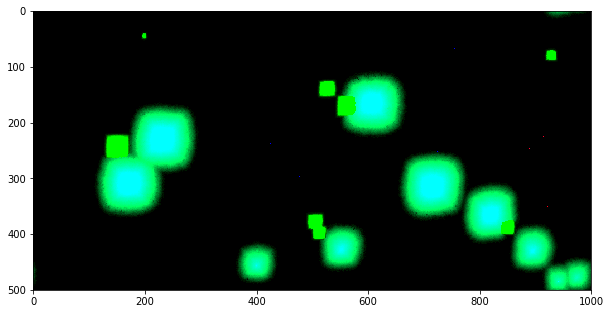

SPECIES,population,energy,strength/ph_cap
OrganismType.PLANT_A,80125,3856.77905273,0.0
OrganismType.PLANT_B,7666,15651.4140625,413.675842285
OrganismType.HERBIVORE,9,2819.39257812,11.4289655685
OrganismType.CARNIVORE,10,1720.07446289,8.53295326233


PLANT_A,mean,min,max,variance
energy,3856.77905273,100.300918579,22005.2285156,8539254.0
ener. at birth,200.532714844,166.222885132,248.319000244,100.878997803
min. en. proc.,377.696289062,264.226348877,459.593780518,458.160644531


PLANT_B,mean,min,max,variance
energy,15651.4140625,100.033607483,106208.773438,303668768.0
age,111.524391174,0.0,260.0,4918.32470703
phot. cap.,413.675842285,0.0,1300.06018066,78353.453125


HERBIVORE,mean,min,max,variance
energy,2819.39257812,477.289611816,12755.8867188,11706945.0
ener. capacity,31090.9882812,11549.5078125,59793.2148438,240833296.0
strength,11.4289655685,4.7907576561,19.9208030701,22.6793994904


CARNIVORE,mean,min,max,variance
energy,1720.07446289,111.126235962,4312.07177734,1861421.875
ener. capacity,28241.2421875,10051.3916016,48353.4492188,167978416.0
strength,8.53295326233,1.07442498207,14.8126420975,20.2960357666
ideal temp,55.5492897034,35.9878578186,66.9909210205,161.388504028
max temp dev,17.2656116486,1.6142193079,39.3816604614,216.41595459
moving freq,0.654648244381,0.31469398737,0.957532644272,0.0557859577239


  0%|          | 267/1000000 [00:13<24:43:06, 11.23it/s]

In [ ]:
num_iters = 1000000
num_organisms = []
periodic_plot = 20
import tqdm
#e.create_new_organisms(eco.OrganismType.PLANT_A, 100);
#e.create_new_organisms(eco.OrganismType.PLANT_B, 100);
#e.create_new_organisms(eco.OrganismType.HERBIVORE, 10000);
#e.create_new_organisms(eco.OrganismType.CARNIVORE, 10);
#print e.get_num_organisms(), "organisms created"

for i in tqdm.tqdm(range(num_iters)):
    
    start = time.time()
    try:
        e.evolve()
    except KeyboardInterrupt:
        break
    num_organisms.append(e.get_num_organisms())
     
    e.keep_number_of_organisms_above(eco.OrganismType.PLANT_A, 10)
    e.keep_number_of_organisms_above(eco.OrganismType.PLANT_B, 10)
    e.keep_number_of_organisms_above(eco.OrganismType.HERBIVORE, 10)
    e.keep_number_of_organisms_above(eco.OrganismType.CARNIVORE, 10)
 
    if i % periodic_plot == 0:        
        """
        m_sl = np.array(eco.Matrix(e,
                                  eco.BiotopeAttribute.SUN_LIGHT),
                     copy=False) * 10.0
        m_te = np.array(eco.Matrix(e,
                                  eco.BiotopeAttribute.TEMPERATURE),
                     copy=False) * 10.0
        """
        m_aa = np.array(eco.Matrix(e,
                                  eco.OrganismAttribute.ENERGY_RESERVE,
                                  eco.OrganismType.PLANT_A),
                     copy=False) * 10.0
        m_ab = np.array(eco.Matrix(e,
                                  eco.OrganismAttribute.ENERGY_RESERVE,
                                  eco.OrganismType.PLANT_B),
                     copy=False)
        m_a = m_aa + m_ab * 10.0
        m_b = np.array(eco.Matrix(e,
                                  eco.OrganismAttribute.ENERGY_RESERVE,
                                  eco.OrganismType.HERBIVORE),
                     copy=False)
        m_c = np.array(eco.Matrix(e,
                                  eco.OrganismAttribute.IDEAL_TEMPERATURE,
                                  eco.OrganismType.CARNIVORE),
                     copy=False)
        m_d = np.array(eco.Matrix(e,
                                  eco.OrganismAttribute.STRENGTH,
                                  eco.OrganismType.CARNIVORE),
                     copy=False)
                
        #m_c += m_ab
        m_b += m_d * 20 - 3 * m_c + m_aa * 0.007
        #m_b += m_ab
        image = np.zeros((m_a.shape[1], m_a.shape[0], 3))
        image[:, :, 0] = m_c.T * 3 #/ 1500.0 #+ m_te.T / 2000.0 # r
        image[:, :, 1] = m_a.T / 35000.0 #+ m_sl.T / 1000.0 # g
        image[:, :, 2] = m_b.T / 600.0 #+ m_sl.T / 1000.0 # b
        plt.figure(figsize=(10, 10))
        plt.imshow(image[:, :, :], interpolation='None', vmin=0.0, vmax=1.0)
        #if i % (10 * periodic_plot) == 0:
        #    plt.figure()
        #    plt.plot(num_organisms, 'b')
        #    plt.grid()
        #    plt.xlabel('Cycle')
        #    plt.ylabel('Num organisms')
        #    plt.show()       
        
        main_table = [
            ["SPECIES", "population", "energy", "strength/ph_cap"],
            make_main_row(eco.OrganismType.PLANT_A),
            make_main_row(eco.OrganismType.PLANT_B),
            make_main_row(eco.OrganismType.HERBIVORE),
            make_main_row(eco.OrganismType.CARNIVORE)
        ]
        
        table_PLANT_A = [
            ["PLANT_A", "mean", "min", "max", "variance"],
            make_row(eco.OrganismType.PLANT_A, "energy", eco.OrganismAttribute.ENERGY_RESERVE),
            make_row(eco.OrganismType.PLANT_A, "ener. at birth", eco.OrganismAttribute.ENERGY_RESERVE_AT_BIRTH),
            make_row(eco.OrganismType.PLANT_A, "min. en. proc.", eco.OrganismAttribute.MINIMUM_ENERGY_RESERVE_FOR_PROCREATING)
        ]
        
        table_PLANT_B = [
            ["PLANT_B", "mean", "min", "max", "variance"],
            make_row(eco.OrganismType.PLANT_B, "energy", eco.OrganismAttribute.ENERGY_RESERVE),
            make_row(eco.OrganismType.PLANT_B, "age", eco.OrganismAttribute.AGE),
            make_row(eco.OrganismType.PLANT_B, "phot. cap.", eco.OrganismAttribute.PHOTOSYNTHESIS_CAPACITY)
        ]

        table_HERBIVORE = [
            ["HERBIVORE", "mean", "min", "max", "variance"],
            make_row(eco.OrganismType.HERBIVORE, "energy", eco.OrganismAttribute.ENERGY_RESERVE),
            make_row(eco.OrganismType.HERBIVORE, "ener. capacity", eco.OrganismAttribute.MAX_ENERGY_RESERVE_CAPACITY),
            make_row(eco.OrganismType.HERBIVORE, "strength", eco.OrganismAttribute.STRENGTH)
        ]
        
        table_CARNIVORE = [
            ["CARNIVORE", "mean", "min", "max", "variance"],
            make_row(eco.OrganismType.CARNIVORE, "energy", eco.OrganismAttribute.ENERGY_RESERVE),
            make_row(eco.OrganismType.CARNIVORE, "ener. capacity", eco.OrganismAttribute.MAX_ENERGY_RESERVE_CAPACITY),
            make_row(eco.OrganismType.CARNIVORE, "strength", eco.OrganismAttribute.STRENGTH),
            make_row(eco.OrganismType.CARNIVORE, "ideal temp", eco.OrganismAttribute.IDEAL_TEMPERATURE),
            make_row(eco.OrganismType.CARNIVORE, "max temp dev", eco.OrganismAttribute.MAX_TEMPERATURE_DEVIATION),
            make_row(eco.OrganismType.CARNIVORE, "moving freq", eco.OrganismAttribute.MOVING_FREQUENCY)
        ]
        
        clear_output(wait=True)
        plt.show()
       
        display(HTML(tabulate.tabulate(main_table, tablefmt='html')))
        display(HTML(tabulate.tabulate(table_PLANT_A, tablefmt='html')))
        display(HTML(tabulate.tabulate(table_PLANT_B, tablefmt='html')))
        display(HTML(tabulate.tabulate(table_HERBIVORE, tablefmt='html')))
        display(HTML(tabulate.tabulate(table_CARNIVORE, tablefmt='html')))
       
        #print e.get_num_organisms()
       

In [ ]:
#!pip install tqdm

In [ ]:
#m_sl

In [ ]:
#!pip install tabulate

In [ ]:

table = [["Sun",696000,1989100000],
         ["Earth",6371,5973.6],
         ["Moon",1737,73.5],
         ["Mars",3390,641.85]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))